In [1]:
### final project code for OCEAN 215 equator data

In [2]:
### import block 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
from datetime import timedelta
import netCDF4
### imports for graphing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm

In [3]:
### initiating filepath
filepath_eq = '~/project-stuff/data/near.eq-p18.csv'

## openign file,  .iloc[1:] to get rid of the units line in each data set. 
equat_df = (pd.read_csv(filepath_eq, skiprows = 52, sep = ',')).iloc[1:-1]

#visualizing the data and its parameters
#display(equat_df.columns)
#display(equat_df)


In [4]:
#making variables 

#equator data
# declare these first so that I can round them
eq_temp = equat_df['CTDTMP'].astype(float)
eq_lat = equat_df['LATITUDE'].astype(float)

#rounding to nearest .5 values for both lat and temp
# not rounding ph because there are already similar values. 
equat_df['round_temp']= np.round(eq_temp*2)/2
equat_df['round_lat'] = np.round(eq_lat*2)/2

# make variables for the new columns created right above and index by correct temp values
eq_roundtemp = equat_df['round_temp'].loc[eq_temp <= 15].astype(float)
eq_roundlat = equat_df['round_lat'].loc[eq_temp <= 15].astype(float)


# making variables that are indexed by the non errored temp and also turn into floats
eq_depth = equat_df['DEPTH'].loc[eq_temp <= 15].astype(float)
eq_ph = equat_df['PH_SWS'].loc[eq_temp <= 15].astype(float)
eq_lat = equat_df['LATITUDE'].loc[eq_temp <= 15].astype(float)
eq_lon = equat_df['LONGITUDE'].loc[eq_temp <= 15].astype(float) #not activly using this but good to have
eq_temp = equat_df['CTDTMP'].loc[eq_temp <= 15].astype(float)



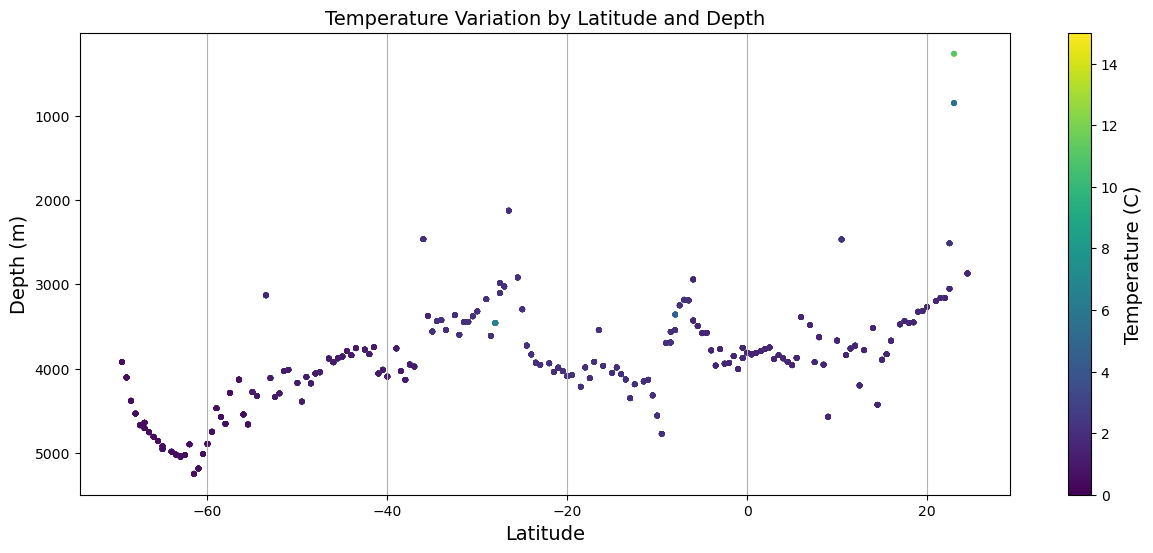

In [5]:
# plotting a graph of temp, depth, and lat
# general figure 
fig, ax = plt.subplots(figsize =(15,6))
sp = ax.scatter(eq_roundlat, eq_depth, c = eq_roundtemp, marker = '.', label = 'Temperature', vmin = 0, vmax =15)

# aestetics of plot
ax.invert_yaxis()
ax.set_ylabel('Depth (m)', fontsize = 14)
ax.set_xlabel('Latitude', fontsize = 14)
plt.title('Temperature Variation by Latitude and Depth', fontsize = 14)              
c1 = plt.colorbar(sp, ax=ax )
c1.set_label('Temperature (C)', fontsize = 14)
ax.grid(axis = 'x')

plt.savefig( 'TEMP 215 graph equator')


In [6]:
# subset the already subsetted data by ph this time to delete errored PH values
# use loc wiht boolean condition to get only the values that arent -999 error

eq_roundlat = eq_roundlat.loc[eq_ph != -999]
eq_depth = eq_depth.loc[eq_ph != -999]
eq_ph = eq_ph.loc[eq_ph != -999]

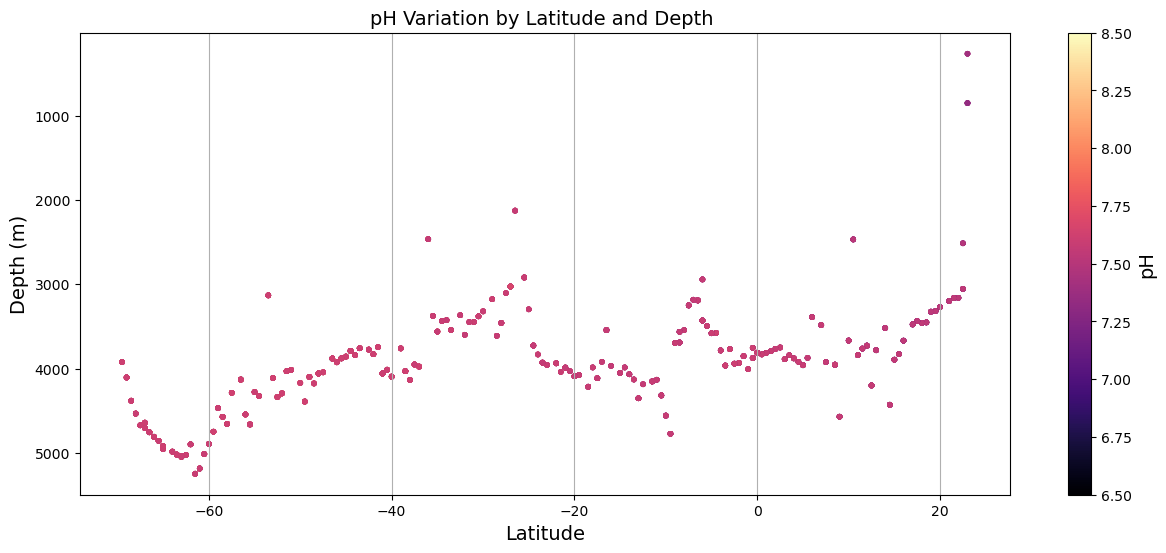

In [8]:
# plotting a graph of pH, depth, and lat.
# general figure 
fig, ax = plt.subplots(figsize =(15,6))
sp2 = ax.scatter(eq_roundlat, eq_depth, c= eq_ph, cmap = 'magma', marker = '.', label = 'pH', vmin=6.5, vmax = 8.5)

# figure aestetics
ax.invert_yaxis()
ax.set_ylabel('Depth (m)',fontsize = 14)
ax.set_xlabel('Latitude', fontsize = 14)
c2 = plt.colorbar(sp2, ax=ax )
c2.set_label('pH', fontsize = 14)
plt.title('pH Variation by Latitude and Depth ', fontsize = 14)  
ax.grid(axis = 'x')

plt.savefig('pH 215 graph equator')